<a href="https://colab.research.google.com/github/AlphaMale258/script/blob/main/Script%20Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Input Data

In [1]:
!pip install yfinance

In [10]:
import pandas as pd

In [17]:
import yfinance as yf

# Contoh: ambil data BBCA dan BMRI dari Yahoo Finance
# Ticker Yahoo Finance untuk BBCA adalah 'BBCA.JK', dan BMRI adalah 'BMRI.JK'
bbca = yf.download('BBCA.JK', start='2021-01-01', end='2025-01-01')
bmri = yf.download('BMRI.JK', start='2021-01-01', end='2025-01-01')

/tmp/ipython-input-3838158585.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bbca = yf.download('BBCA.JK', start='2021-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3838158585.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  bmri = yf.download('BMRI.JK', start='2021-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


In [18]:
bbca

Price,Close,High,Low,Open,Volume
Ticker,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK
Date,,,,,
2021-01-04,6068.224609,6085.980936,5966.125732,6037.151038,47937000
2021-01-05,6294.618652,6294.618652,6081.542704,6090.420868,104831000
2021-01-06,6165.885742,6281.301890,6108.177668,6259.106477,89753500
2021-01-07,6183.642090,6259.106494,6134.812181,6214.715668,71360000
2021-01-08,6259.106445,6285.740941,6192.520207,6245.789198,75033500
...,...,...,...,...,...
2024-12-20,9361.940430,9458.955356,9337.686698,9361.940430,91576900
2024-12-23,9483.208984,9555.970179,9410.447790,9410.447790,43292100


In [21]:
# Gabungkan berdasarkan tanggal
gabung = pd.merge(bbca["Close"], bmri["Close"], on="Date")
gabung

Ticker,BBCA.JK,BMRI.JK
Date,,
2021-01-04,6068.224609,2467.006836
2021-01-05,6294.618652,2438.541260
2021-01-06,6165.885742,2438.541260
2021-01-07,6183.642090,2457.518311
2021-01-08,6259.106445,2485.983887
...,...,...
2024-12-20,9361.940430,5156.255371
2024-12-23,9483.208984,5292.543945
2024-12-24,9458.955078,5224.399902


In [22]:
gabung

Ticker,BBCA.JK,BMRI.JK
Date,,
2021-01-04,6068.224609,2467.006836
2021-01-05,6294.618652,2438.541260
2021-01-06,6165.885742,2438.541260
2021-01-07,6183.642090,2457.518311
2021-01-08,6259.106445,2485.983887
...,...,...
2024-12-20,9361.940430,5156.255371
2024-12-23,9483.208984,5292.543945
2024-12-24,9458.955078,5224.399902


### Grafik Harga Saham

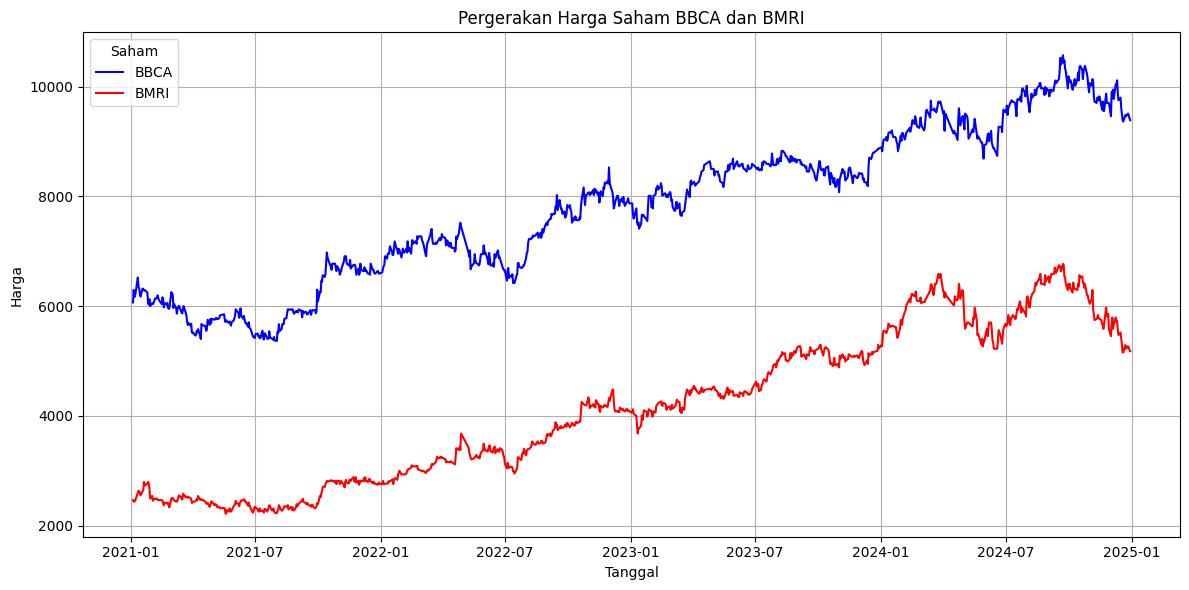

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

gabung = gabung.reset_index()

gabung = gabung.rename(columns={
    "BBCA.JK": "BBCA",
    "BMRI.JK": "BMRI"
})

# Ubah ke format long agar bisa diplot seperti ggplot2
data_long = gabung.melt(id_vars="Date", value_vars=["BBCA", "BMRI"],
                        var_name="Saham", value_name="Harga")

# Plot garis
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_long, x="Date", y="Harga", hue="Saham", palette={"BBCA": "blue", "BMRI": "red"})
plt.title("Pergerakan Harga Saham BBCA dan BMRI")
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.grid(True)
plt.tight_layout()
plt.show()

### Grafik Return Saham

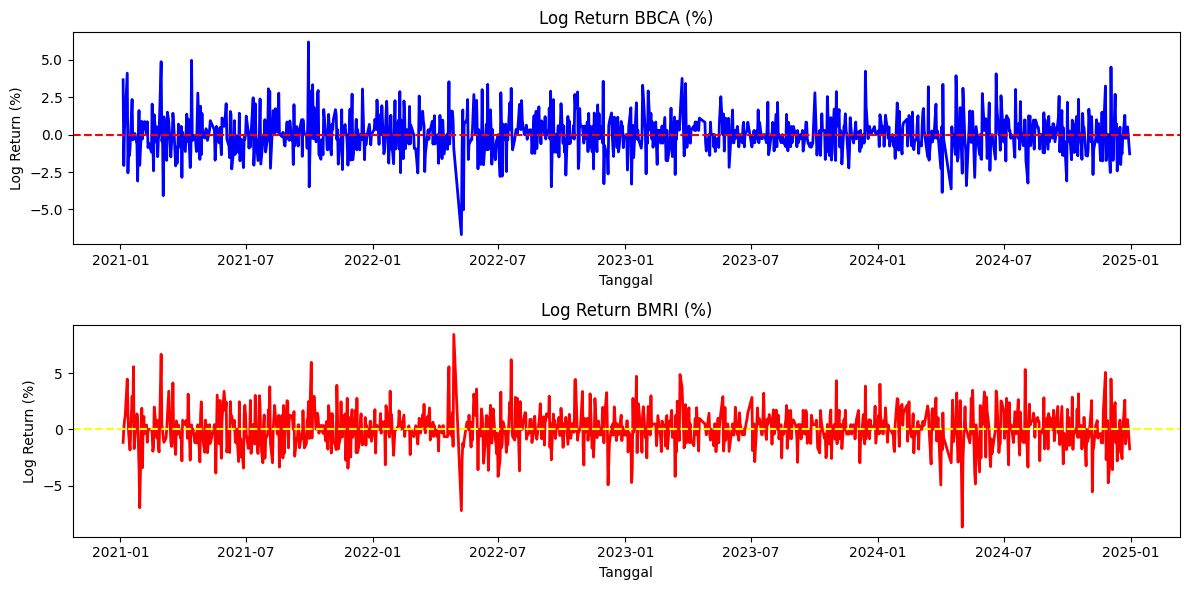

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Hitung log return dan konversi ke persen
log_return_bbca = np.log(gabung["BBCA"]).diff() * 100
log_return_bmri = np.log(gabung["BMRI"]).diff() * 100

# Gabungkan jadi satu DataFrame
log_returns = pd.DataFrame({
    "Date": gabung["Date"],
    "BBCA": log_return_bbca,
    "BMRI": log_return_bmri
}).dropna().reset_index(drop=True)

# Plot return BBCA dan BMRI
plt.figure(figsize=(12, 6))

# Plot BBCA
plt.subplot(2, 1, 1)
plt.plot(log_returns["Date"], log_returns["BBCA"], color='blue', linewidth=2)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Log Return BBCA (%)")
plt.xlabel("Tanggal")
plt.ylabel("Log Return (%)")

# Plot BMRI
plt.subplot(2, 1, 2)
plt.plot(log_returns["Date"], log_returns["BMRI"], color='red', linewidth=2)
plt.axhline(y=0, color='yellow', linestyle='--')
plt.title("Log Return BMRI (%)")
plt.xlabel("Tanggal")
plt.ylabel("Log Return (%)")

plt.tight_layout()
plt.show()

### Statistika Deskriptif

#### 1. Statistika Deskriptif BBCA & BMRI (level & return)

In [26]:
from scipy.stats import skew, kurtosis

# Untuk harga saham
print("Statistika Deskriptif Harga BBCA:")
print(gabung["BBCA"].describe())
print("Varian:", np.var(gabung["BBCA"], ddof=1))
print("Skewness:", skew(gabung["BBCA"]))
print("Kurtosis:", kurtosis(gabung["BBCA"]))

print("\nStatistika Deskriptif Harga BMRI:")
print(gabung["BMRI"].describe())
print("Varian:", np.var(gabung["BMRI"], ddof=1))
print("Skewness:", skew(gabung["BMRI"]))
print("Kurtosis:", kurtosis(gabung["BMRI"]))

# Untuk log return dalam persen
print("\nStatistika Deskriptif Log Return BBCA:")
print(log_return_bbca.describe())
print("Varian:", np.var(log_return_bbca.dropna(), ddof=1))
print("Skewness:", skew(log_return_bbca.dropna()))
print("Kurtosis:", kurtosis(log_return_bbca.dropna()))

print("\nStatistika Deskriptif Log Return BMRI:")
print(log_return_bmri.describe())
print("Varian:", np.var(log_return_bmri.dropna(), ddof=1))
print("Skewness:", skew(log_return_bmri.dropna()))
print("Kurtosis:", kurtosis(log_return_bmri.dropna()))


Statistika Deskriptif Harga BBCA:
count      969.000000
mean      7798.971345
std       1373.433350
min       5365.559570
25%       6706.874023
50%       7895.059082
75%       8798.982422
max      10570.414062
Name: BBCA, dtype: float64
Varian: 1886319.1661484994
Skewness: -0.011698625762187918
Kurtosis: -1.0706313849995872

Statistika Deskriptif Harga BMRI:
count     969.000000
mean     4136.757224
std      1351.360881
min      2217.577148
25%      2816.126465
50%      4112.038086
75%      5229.527344
max      6769.004883
Name: BMRI, dtype: float64
Varian: 1826176.2314973236
Skewness: 0.21552243007227914
Kurtosis: -1.2533744309070245

Statistika Deskriptif Log Return BBCA:
count    968.000000
mean       0.045059
std        1.357011
min       -6.679741
25%       -0.787965
50%        0.000000
75%        0.818562
max        6.187548
Name: BBCA, dtype: float64
Varian: 1.84147842293762
Skewness: 0.21210209129492089
Kurtosis: 1.6034006675011083

Statistika Deskriptif Log Return BMRI:
count 

#### 2. Uji Stasioneritas - ADF Test

In [27]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
print("\nADF Test Log Return BBCA:")
adf_result_bbca = adfuller(log_return_bbca.dropna())
print(f"ADF Statistic: {adf_result_bbca[0]}")
print(f"p-value: {adf_result_bbca[1]}")

print("\nADF Test Log Return BMRI:")
adf_result_bmri = adfuller(log_return_bmri.dropna())
print(f"ADF Statistic: {adf_result_bmri[0]}")
print(f"p-value: {adf_result_bmri[1]}")



ADF Test Log Return BBCA:
ADF Statistic: -25.34784818513256
p-value: 0.0

ADF Test Log Return BMRI:
ADF Statistic: -24.680206760136645
p-value: 0.0


#### 3. Cek Nilai Unik, Plot, dan Head


Nilai unik BBCA log return:
[ 3.662901   -2.06632872  0.28756338  1.21300018  4.09921758 -2.55098351
 -0.56022612 -1.41446    -0.93023041  2.34469041 -0.3517399   0.
 -0.28228699  0.07064455 -0.63762822 -3.10381115 -0.44086561  1.60705273
 -2.04984617  0.88365904 -0.29368625  0.36697123  0.43859361  0.8714661
  0.07227059  0.86331567 -0.86331567 -0.57971242 -1.16958912  2.03791027
 -0.57803689 -2.42036067  1.32745852 -0.51415058  0.51415058 -1.47603485
 -0.29785755  0.07454965  4.87191845 -0.42673186 -0.21405861 -4.08221975
  1.18346329 -1.18346329 -1.72612573  1.50266785  0.89087545 -1.48921591
 -0.60197534 -0.22665749  1.42697329  0.81694839 -2.09275408 -0.83426402
 -1.92242175 -1.0929125   0.70396004 -0.86105646  0.54879984 -2.85506508
  0.16077631 -1.1308827   0.16235125  1.36932296 -0.46508692  1.05390523
 -2.20146304 -1.07749971  4.95835405 -0.39731266 -0.07965231 -0.07971581
 -0.55977098 -1.12903967  0.80775181  2.7768561  -1.65684885  1.89131521
 -1.33596792  1.41400419 -0.078

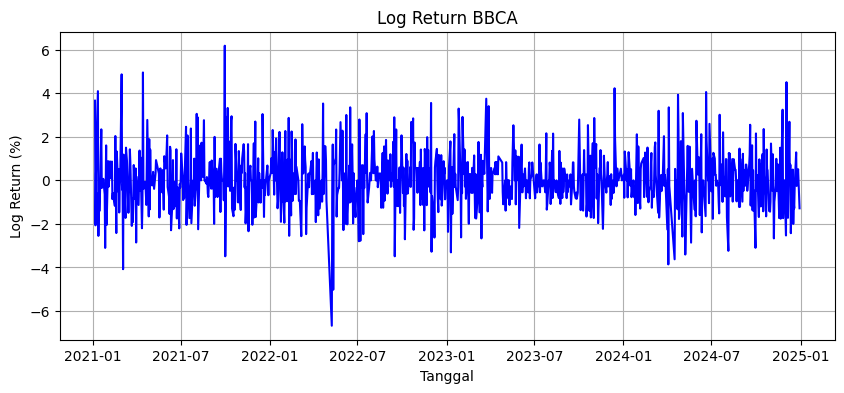

5 Baris Pertama Log Return BBCA (Dalam Satuan Persen):
0     3.663 %
1    -2.066 %
2     0.288 %
3     1.213 %
4     4.099 %
Name: BBCA, dtype: object


In [28]:
# Cek nilai unik dan head
print("\nNilai unik BBCA log return:")
print(log_return_bbca.dropna().unique())

# Plot return BBCA
plt.figure(figsize=(10, 4))
plt.plot(log_returns["Date"], log_returns["BBCA"], color='blue')
plt.title("Log Return BBCA")
plt.xlabel("Tanggal")
plt.ylabel("Log Return (%)")
plt.grid(True)
plt.show()

# Ambil 5 baris pertama dan format ke 3 angka desimal + persen
log_return_bbca_head = log_returns["BBCA"].head().apply(lambda x: f"{x:.3f} %")

# Tampilkan
print("5 Baris Pertama Log Return BBCA (Dalam Satuan Persen):")
print(log_return_bbca_head)


#### 3.a Simpan ke variabel (dalam persentase) untuk modeling selanjutnya

In [29]:
Bank1 = log_return_bbca / 100  # konversi ke desimal kalau perlu
Bank2 = log_return_bmri / 100

In [36]:
Bank1

,BBCA
1,0.036629
2,-0.020663
3,0.002876
4,0.012130
5,0.040992
...,...
964,-0.002587
965,0.012870
966,-0.002561
967,0.005115


In [37]:
Bank2

,BMRI
1,-0.011606
2,0.000000
3,0.007752
4,0.011516
5,0.044783
...,...
964,0.000000
965,0.026088
966,-0.012959
967,0.008658


In [35]:
Bank1 = Bank1.dropna()
Bank2 = Bank2.dropna()

,BMRI
1,-0.011606
2,0.000000
3,0.007752
4,0.011516
5,0.044783
...,...
964,0.000000
965,0.026088
966,-0.012959
967,0.008658


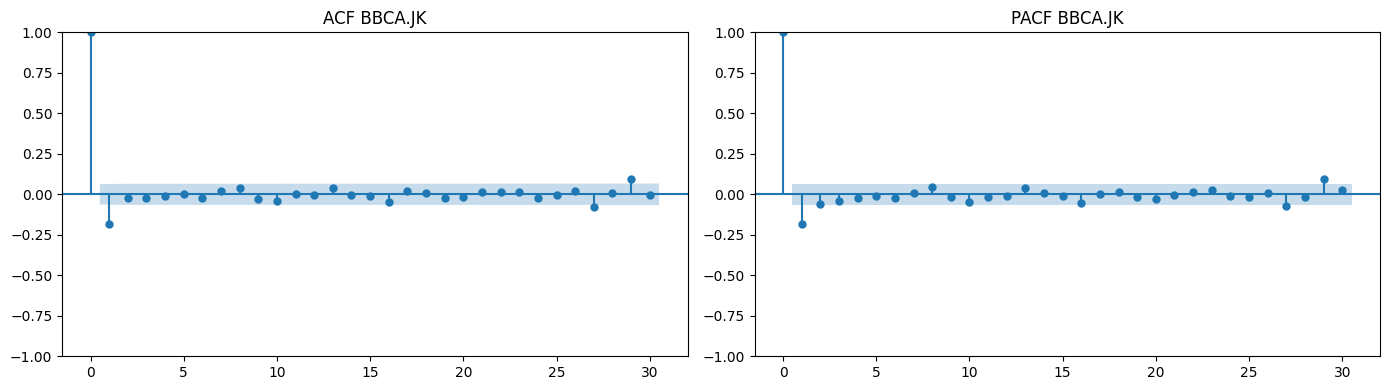

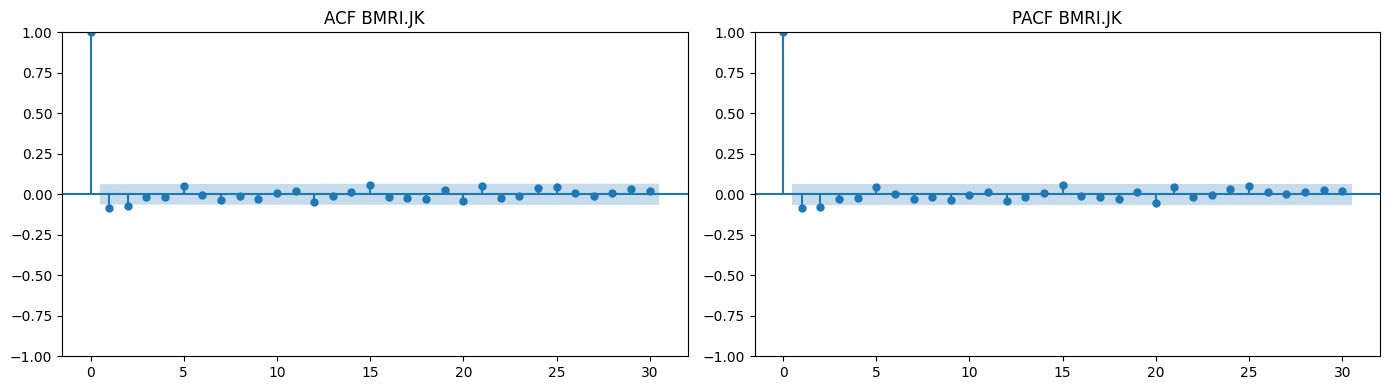

In [38]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF dan PACF BBCA
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(Bank1.dropna(), ax=ax[0], title="ACF BBCA.JK")
plot_pacf(Bank1.dropna(), ax=ax[1], title="PACF BBCA.JK", method='ywm')  # method 'ywm' sering stabil
plt.tight_layout()
plt.show()

# Plot ACF dan PACF BMRI
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(Bank2.dropna(), ax=ax[0], title="ACF BMRI.JK")
plot_pacf(Bank2.dropna(), ax=ax[1], title="PACF BMRI.JK", method='ywm')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA(1,0,1) BBCA Summary:
                                SARIMAX Results                                
Dep. Variable:                   BBCA   No. Observations:                  968
Model:                 ARIMA(0, 0, 1)   Log Likelihood                2807.893
Date:                Thu, 07 Aug 2025   AIC                          -5609.785
Time:                        18:23:17   BIC                          -5595.159
Sample:                             0   HQIC                         -5604.217
                                - 968                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.279      0.201      -0.000       0.001
ma.L1         -0.1951      0.029     -6.727      0.000      -0.252      -0.138
sigma2         0.0002   

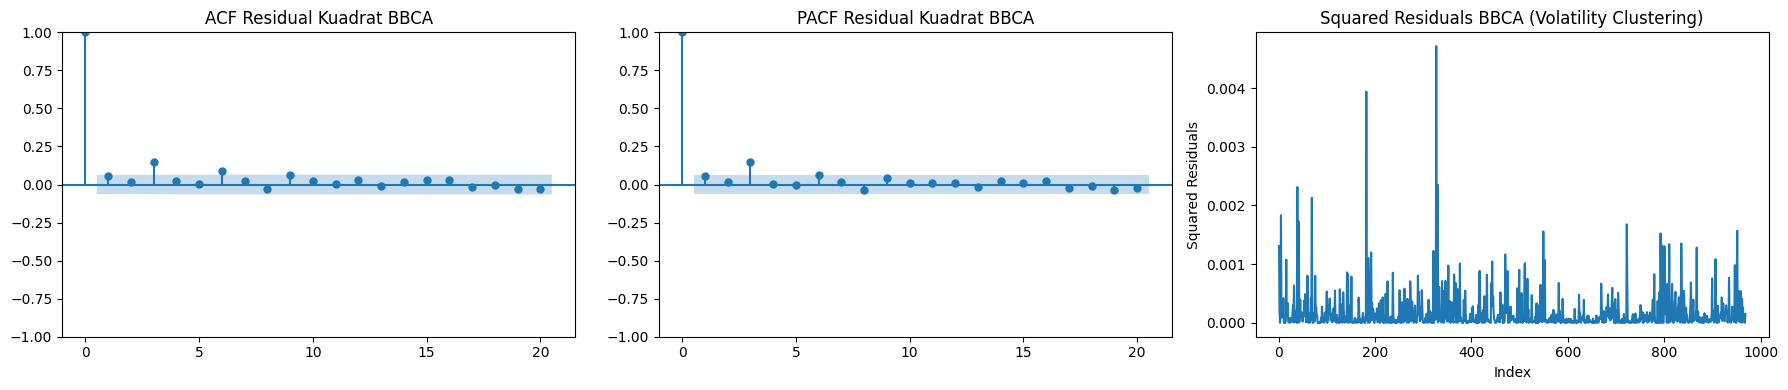

In [39]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt

# Asumsikan Bank1 sudah berupa pandas Series return log saham BBCA

# --- Model ARIMA untuk BBCA: ARIMA(p,d,q) berdasarkan cutoff ACF(1), PACF(2) ---
model_bbca = ARIMA(Bank1, order=(0, 0, 1)).fit()
print("ARIMA(1,0,1) BBCA Summary:\n", model_bbca.summary())

# Uji Signifikansi Koefisien (t-values dan p-values)
print("\nKoefisien Signifikansi BBCA:")
print(model_bbca.pvalues)

# Uji Ljung-Box pada residual kuadrat untuk cek heteroskedastisitas
ljung_box_bbca = acorr_ljungbox(model_bbca.resid**2, lags=[12], return_df=True)
print("\nLjung-Box test pada residual kuadrat BBCA:\n", ljung_box_bbca)

# Uji Normalitas Residual (Kolmogorov-Smirnov)
ks_stat_bbca, ks_pvalue_bbca = kstest(model_bbca.resid, 'norm')
print(f"\nKS test residual BBCA: stat={ks_stat_bbca:.4f}, p-value={ks_pvalue_bbca:.4f}")

# Cek NaN/Inf residual BBCA (Sebelum)
print("Ada NaN pada residual BBCA?", np.any(np.isnan(model_bbca.resid)))
print("Ada Inf pada residual BBCA?", np.any(np.isinf(model_bbca.resid)))

# Bersihkan residual dari NaN/Inf
resid_bbca_clean = model_bbca.resid[~np.isnan(model_bbca.resid)]
resid_bbca_clean = resid_bbca_clean[~np.isinf(resid_bbca_clean)]

# Cek NaN/Inf residual BBCA (Sesudah)
print("Ada NaN pada residual BBCA?", np.any(np.isnan(resid_bbca_clean)))
print("Ada Inf pada residual BBCA?", np.any(np.isinf(resid_bbca_clean)))

# Uji ARCH dengan residual bersih
arch_test_bbca = het_arch(resid_bbca_clean, nlags=12)
print(f"ARCH LM test BBCA: LM stat={arch_test_bbca[0]:.4f}, p-value={arch_test_bbca[1]:.4f}")

# --- Plot ACF, PACF Residual Kuadrat BBCA (Volatility Clustering) ---
resid_sq_bbca = model_bbca.resid**2
print("Ada NaN di resid kuadrat?", np.any(np.isnan(resid_sq_bbca)))
print("Ada Inf di resid kuadrat?", np.any(np.isinf(resid_sq_bbca)))

resid_sq_bbca_clean = resid_sq_bbca[~np.isnan(resid_sq_bbca)]
resid_sq_bbca_clean = resid_sq_bbca_clean[~np.isinf(resid_sq_bbca_clean)]

ljung_box_bbca = acorr_ljungbox(resid_sq_bbca_clean, lags=[12], return_df=True)
print("\nLjung-Box test pada residual kuadrat BBCA:\n", ljung_box_bbca)

fig, axs = plt.subplots(1, 3, figsize=(18, 4))

sm.graphics.tsa.plot_acf(resid_sq_bbca, lags=20, ax=axs[0], title="ACF Residual Kuadrat BBCA")
sm.graphics.tsa.plot_pacf(resid_sq_bbca, lags=20, ax=axs[1], title="PACF Residual Kuadrat BBCA")

axs[2].plot(resid_sq_bbca)
axs[2].set_title("Squared Residuals BBCA (Volatility Clustering)")
axs[2].set_ylabel("Squared Residuals")
axs[2].set_xlabel("Index")

plt.tight_layout()
plt.show()

In [42]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 13.1 MB/s eta 0:00:00


                              AR - GARCH Model Results                              
Dep. Variable:                         BBCA   R-squared:                       0.321
Mean Model:                              AR   Adj. R-squared:                  0.320
Vol Model:                            GARCH   Log-Likelihood:                2598.08
Distribution:      Standardized Student's t   AIC:                          -5184.16
Method:                  Maximum Likelihood   BIC:                          -5154.92
                                              No. Observations:                  966
Date:                      Thu, Aug 07 2025   Df Residuals:                      964
Time:                              18:27:25   Df Model:                            2
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------

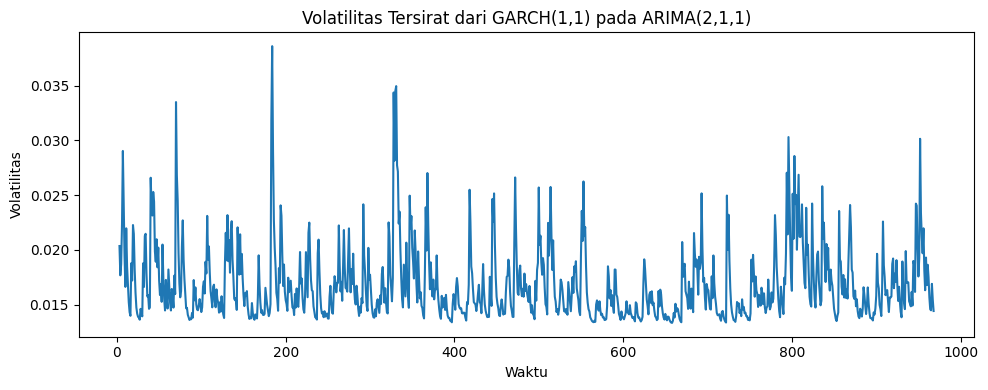

In [51]:
import numpy as np
import pandas as pd
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from scipy.stats import jarque_bera

# Misalnya Bank1 sudah merupakan Series log return harga
# Langkah 1: Differencing (karena ARIMA(2,1,1))
Bank1_diff = Bank1.diff().dropna()  # Ini membuat data jadi stasioner

# Langkah 2: Fit GARCH dengan mean model ARMA(2,1)
garch_model = arch_model(
    Bank1_diff,
    vol='GARCH',
    p=1, q=1,             # GARCH(1,1)
    mean='ARX',
    lags=1,               # AR(2)
    rescale=False,
    dist='t'
)

garch_fit = garch_model.fit(update_freq=5, disp='off')
print(garch_fit.summary())

# Langkah 3: Uji normalitas residual (Jarque-Bera)
jb_stat, jb_pval = jarque_bera(garch_fit.resid.dropna())
print(f"\nJarque-Bera Test: stat = {jb_stat:.4f}, p-value = {jb_pval:.4f}")

# (Opsional) Plot volatilitas tersirat (conditional volatility)
plt.figure(figsize=(10, 4))
plt.plot(garch_fit.conditional_volatility)
plt.title("Volatilitas Tersirat dari GARCH(1,1) pada ARIMA(2,1,1)")
plt.ylabel("Volatilitas")
plt.xlabel("Waktu")
plt.tight_layout()
plt.show()

In [52]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Ambil residual dan conditional volatility dari hasil fit model
resid = garch_fit.resid.dropna()
sigma = garch_fit.conditional_volatility.dropna()

# Sesuaikan panjang
resid = resid[-len(sigma):]

# Indikator shock negatif
S = (resid < 0).astype(int)

# Regressor untuk masing-masing uji
X_sign = sm.add_constant(S)
X_neg = sm.add_constant(S * resid)
X_pos = sm.add_constant((1 - S) * resid)
X_joint = sm.add_constant(np.column_stack([S, S * resid, (1 - S) * resid]))

# Response: squared residuals (proxy dari varians)
Y = resid**2

# Uji Sign Bias
model_sign = sm.OLS(Y, X_sign).fit()
print("Sign Bias Test:")
print(model_sign.summary())

# Uji Negative Size Bias
model_neg = sm.OLS(Y, X_neg).fit()
print("\nNegative Size Bias Test:")
print(model_neg.summary())

# Uji Positive Size Bias
model_pos = sm.OLS(Y, X_pos).fit()
print("\nPositive Size Bias Test:")
print(model_pos.summary())

# Joint Test
model_joint = sm.OLS(Y, X_joint).fit()
print("\nJoint Test (F-test):")
print(model_joint.summary())


Sign Bias Test:
                            OLS Regression Results                            
Dep. Variable:                  resid   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5660
Date:                Thu, 07 Aug 2025   Prob (F-statistic):              0.452
Time:                        18:27:41   Log-Likelihood:                 5930.8
No. Observations:                 966   AIC:                        -1.186e+04
Df Residuals:                     964   BIC:                        -1.185e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003   2.39e-05    

# ARIMA-EGARCH

### Pemodelan ARIMA

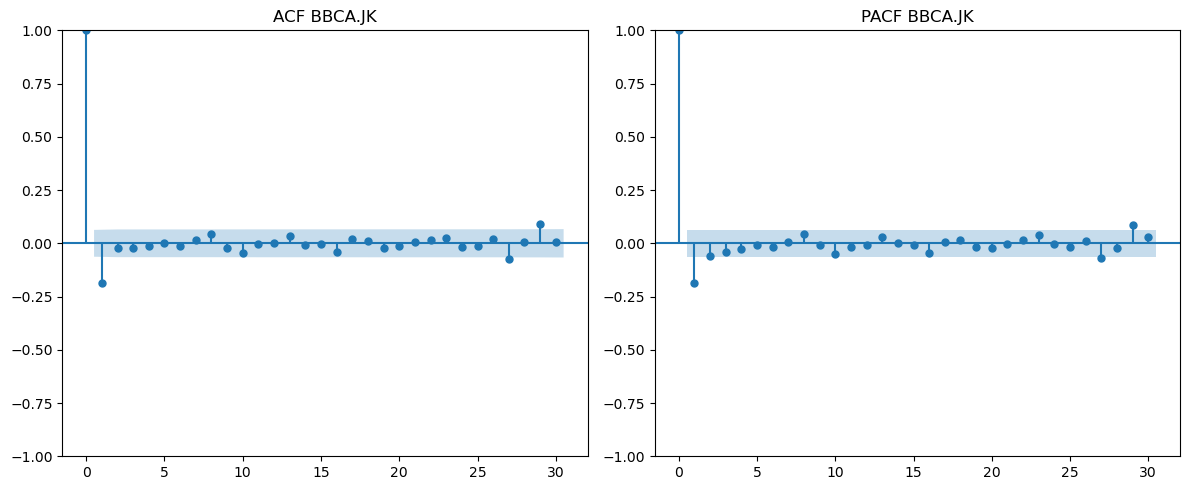

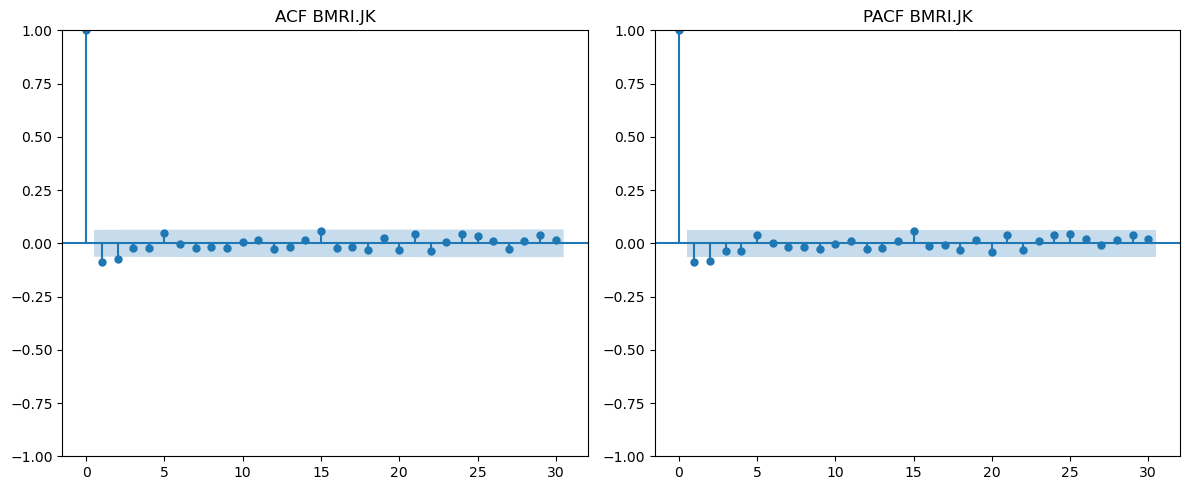

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF dan PACF untuk BBCA
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(Bank1.dropna(), ax=plt.gca(), title="ACF BBCA.JK")

plt.subplot(1, 2, 2)
plot_pacf(Bank1.dropna(), ax=plt.gca(), title="PACF BBCA.JK", method='ywm')
plt.tight_layout()
plt.show()

# Plot ACF dan PACF untuk BMRI
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(Bank2.dropna(), ax=plt.gca(), title="ACF BMRI.JK")

plt.subplot(1, 2, 2)
plot_pacf(Bank2.dropna(), ax=plt.gca(), title="PACF BMRI.JK", method='ywm')
plt.tight_layout()
plt.show()


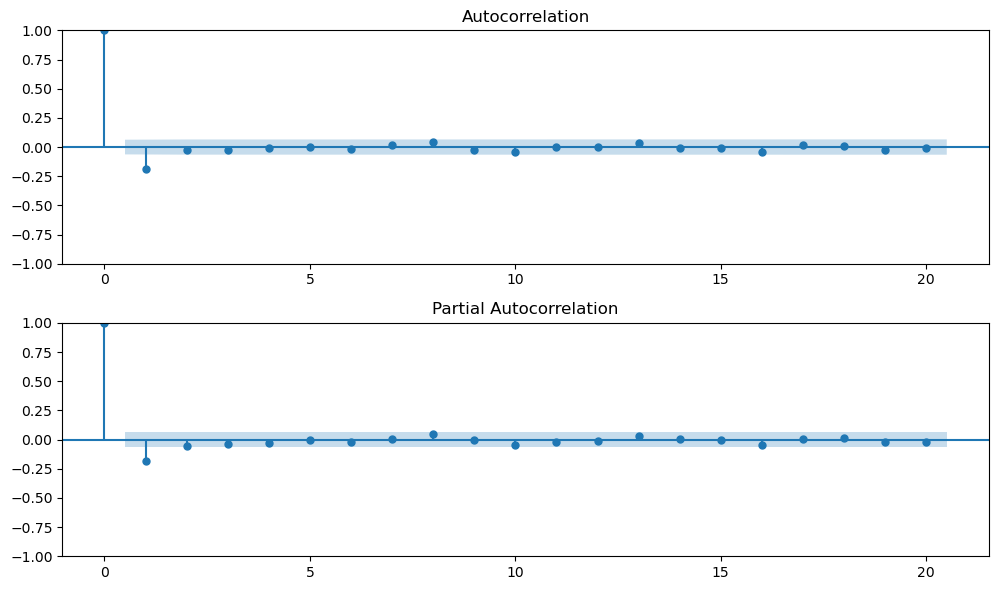

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-5610.904, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5580.371, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-5611.925, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-5615.141, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-5614.439, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-5614.170, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-5612.759, Time=0.57 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-5614.339, Time=0.58 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 2.400 seconds
Best model (auto_arima):                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  968
Model:               SARIMAX(0, 0, 1)   Log Likelihood                2809.571
Date:                Thu, 05 Jun 2025   AIC                          -5615.141
Tim

C:\Users\AldiBoi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AldiBoi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AldiBoi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   BBCA   No. Observations:                  968
Model:                 ARIMA(0, 0, 1)   Log Likelihood                2810.114
Date:                Thu, 05 Jun 2025   AIC                          -5614.228
Time:                        01:43:38   BIC                          -5599.603
Sample:                             0   HQIC                         -5608.661
                                - 968                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.017      0.309      -0.000       0.001
ma.L1         -0.1948      0.029     -6.755      0.000      -0.251      -0.138
sigma2         0.0002   5.89e-06     29.914      0.0

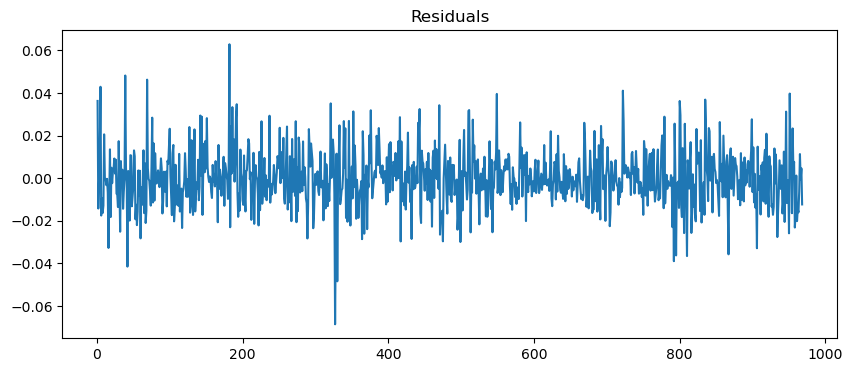

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# 1. Contoh data (gantilah ini dengan data asli kamu)
# Misalnya data deret waktu acak
data = Bank1
data = data[~np.isnan(data)]

series = pd.Series(data)

# 2. Plot ACF dan PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(series, lags=20, ax=ax[0])
plot_pacf(series, lags=20, ax=ax[1])
plt.tight_layout()
plt.show()

# 3. Auto ARIMA untuk deteksi model terbaik (bisa ARMA/ARIMA)
model_auto = auto_arima(series, seasonal=False, stepwise=True, trace=True, suppress_warnings=True)
print(f"Best model (auto_arima): {model_auto.summary()}")

# 4. Fit model ARMA manual, misal ARMA(1,1) atau sesuai hasil auto_arima
model = ARIMA(series, order=(0,0,1))  # ARMA(1,1) karena d=0
model_fit = model.fit()
print(model_fit.summary())

# 5. Plot residual
residuals_bbca = model_fit.resid
plt.figure(figsize=(10,4))
plt.plot(residuals_bbca)
plt.title('Residuals')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# 1. Contoh data (gantilah ini dengan data asli kamu)
# Misalnya data deret waktu acak
data = Bank2
data = data[~np.isnan(data)]

series = pd.Series(data)

# 2. Plot ACF dan PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plot_acf(series, lags=20, ax=ax[0])
plot_pacf(series, lags=20, ax=ax[1])
plt.tight_layout()
plt.show()

# 3. Auto ARIMA untuk deteksi model terbaik (bisa ARMA/ARIMA)
model_auto = auto_arima(series, seasonal=False, stepwise=True, trace=True, suppress_warnings=True)
print(f"Best model (auto_arima): {model_auto.summary()}")

# 4. Fit model ARMA manual, misal ARMA(1,1) atau sesuai hasil auto_arima
model = ARIMA(series, order=(0,0,2))  # ARMA(1,1) karena d=0
model_fit = model.fit()
print(model_fit.summary())

# 5. Plot residual
residuals_bmri = model_fit.resid
plt.figure(figsize=(10,4))
plt.plot(residuals_bmri)
plt.title('Residuals')
plt.show()


ValueError: Unknown model type in mean

### Uji Heteroskedastisitas (Lagrange Multiplier) Efek ARCH

In [ ]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from statsmodels.stats.diagnostic import het_arch
import pandas as pd

# Fungsi uji ARCH sampai lag ke-12
def arch_test_summary(residuals, nama):
    result = {'Lag': [], 'LM Stat': [], 'p-value': []}
    for lag in range(1, 13):
        lm_stat, p_value, _, _ = het_arch(residuals.dropna(), nlags=lag)
        result['Lag'].append(lag)
        result['LM Stat'].append(lm_stat)
        result['p-value'].append(p_value)
    df_result = pd.DataFrame(result)
    print(f"\nHasil Uji ARCH untuk {nama}:\n", df_result)
    return df_result

# Asumsikan residual_bbca dan residual_bmri sudah tersedia
hasil_bbca = arch_test_summary(residuals_bbca, "BBCA")
hasil_bmri = arch_test_summary(residuals_bmri, "BMRI")



Hasil Uji ARCH untuk BBCA:
     Lag    LM Stat   p-value
0     1   3.149607  0.075945
1     2   3.538715  0.170442
2     3  21.655461  0.000077
3     4  22.001833  0.000200
4     5  22.559723  0.000410
5     6  26.812852  0.000157
6     7  27.287175  0.000296
7     8  28.443057  0.000397
8     9  30.014439  0.000436
9    10  30.101993  0.000824
10   11  30.931386  0.001130
11   12  31.283007  0.001783

Hasil Uji ARCH untuk BMRI:
     Lag    LM Stat   p-value
0     1  21.280866  0.000004
1     2  25.604881  0.000003
2     3  25.903013  0.000010
3     4  25.843973  0.000034
4     5  32.406404  0.000005
5     6  32.419462  0.000014
6     7  37.018652  0.000005
7     8  38.392613  0.000006
8     9  38.646088  0.000013
9    10  38.999653  0.000025
10   11  39.402934  0.000045
11   12  38.928792  0.000108


### Pemodelan GARCH

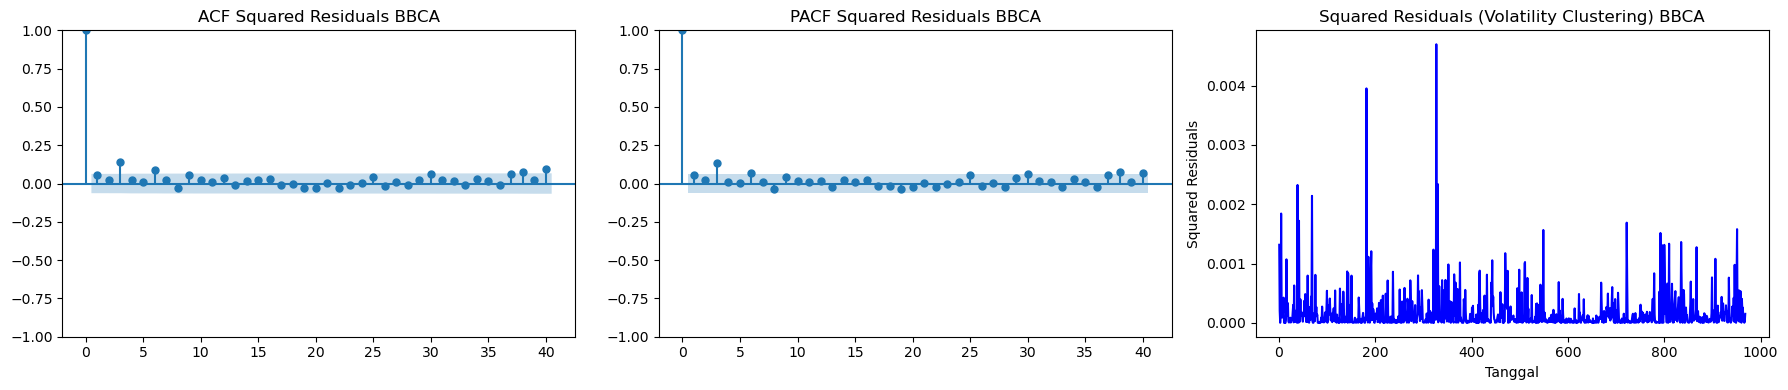

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

# Asumsikan residual_bbca sudah tersedia (dari model ARIMA misalnya)
resbca = residuals_bbca.dropna() ** 2

# Plot ACF, PACF, dan Squared Residuals
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Plot ACF
plot_acf(resbca, ax=axs[0], lags=40, title='ACF Squared Residuals BBCA')

# Plot PACF
plot_pacf(resbca, ax=axs[1], lags=40, title='PACF Squared Residuals BBCA')

# Plot Squared Residuals Time Series
axs[2].plot(resbca.index, resbca, color='blue')
axs[2].set_title('Squared Residuals (Volatility Clustering) BBCA')
axs[2].set_xlabel('Tanggal')
axs[2].set_ylabel('Squared Residuals')

plt.tight_layout()
plt.savefig("residual bbca.png", dpi=300)  # dpi=300 untuk kualitas bagus
plt.show()


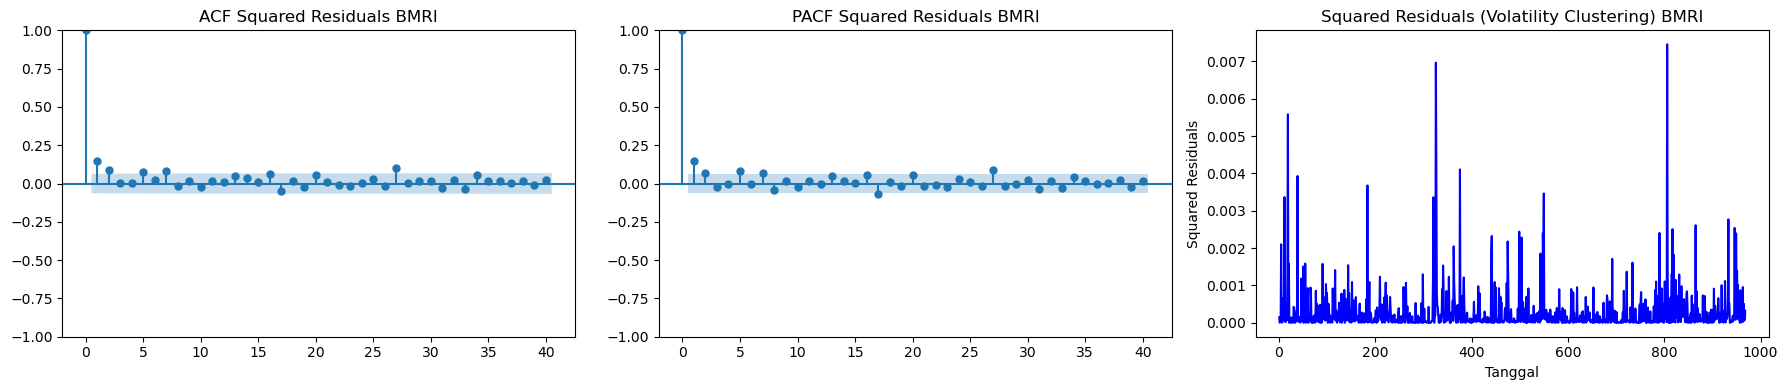

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

# Asumsikan residual_bbca sudah tersedia (dari model ARIMA misalnya)
resbca = residuals_bmri.dropna() ** 2

# Plot ACF, PACF, dan Squared Residuals
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Plot ACF
plot_acf(resbca, ax=axs[0], lags=40, title='ACF Squared Residuals BMRI')

# Plot PACF
plot_pacf(resbca, ax=axs[1], lags=40, title='PACF Squared Residuals BMRI')

# Plot Squared Residuals Time Series
axs[2].plot(resbca.index, resbca, color='blue')
axs[2].set_title('Squared Residuals (Volatility Clustering) BMRI')
axs[2].set_xlabel('Tanggal')
axs[2].set_ylabel('Squared Residuals')

plt.tight_layout()
plt.savefig("residual bmri.png", dpi=300)  # dpi=300 untuk kualitas bagus
plt.show()


In [ ]:
from arch import arch_model
from scipy.stats import jarque_bera

results_bbca = {}

for p in [1, 2, 3]:
    model = arch_model(residuals_bbca*100, vol='GARCH', p=p, q=1, mean='Zero', dist='t')
    fit = model.fit(disp='off')
    results_bbca[f'GARCH({p},1)'] = fit
    print(f"GARCH({p},1) AIC:", fit.aic)

best_model_bbca = min(results_bbca.items(), key=lambda x: x[1].aic)
print("\nModel terbaik BBCA:", best_model_bbca[0])
print(best_model_bbca[1].summary())

jb_stat_bbca, jb_pval_bbca = jarque_bera(best_model_bbca[1].resid)
print("\nJarque-Bera Test BBCA:")
print("Statistik:", jb_stat_bbca)
print("P-value:", jb_pval_bbca)


GARCH(1,1) AIC: 3229.255266513741
GARCH(2,1) AIC: 3231.255265960607
GARCH(3,1) AIC: 3233.255265705157

Model terbaik BBCA: GARCH(1,1)
                          Zero Mean - GARCH Model Results                           
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.001
Vol Model:                            GARCH   Log-Likelihood:               -1610.63
Distribution:      Standardized Student's t   AIC:                           3229.26
Method:                  Maximum Likelihood   BIC:                           3248.76
                                              No. Observations:                  968
Date:                      Thu, Jun 05 2025   Df Residuals:                      968
Time:                              02:10:40   Df Model:                            0
                              Volatility Model                             
                 coef    

In [ ]:
results_bmri = {}

for p in [1, 2, 3]:
    model = arch_model(residuals_bmri*100, vol='GARCH', p=p, q=1, mean='Zero', dist='t')
    fit = model.fit(disp='off')
    results_bmri[f'GARCH({p},1)'] = fit
    print(f"GARCH({p},1) AIC:", fit.aic)

best_model_bmri = min(results_bmri.items(), key=lambda x: x[1].aic)
print("\nModel terbaik BMRI:", best_model_bmri[0])
print(best_model_bmri[1].summary())

jb_stat_bmri, jb_pval_bmri = jarque_bera(best_model_bmri[1].resid)
print("\nJarque-Bera Test BMRI:")
print("Statistik:", jb_stat_bmri)
print("P-value:", jb_pval_bmri)


GARCH(1,1) AIC: 3726.955193962459
GARCH(2,1) AIC: 3730.49438432536
GARCH(3,1) AIC: 3732.4908099978275

Model terbaik BMRI: GARCH(1,1)
                          Zero Mean - GARCH Model Results                           
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.001
Vol Model:                            GARCH   Log-Likelihood:               -1859.48
Distribution:      Standardized Student's t   AIC:                           3726.96
Method:                  Maximum Likelihood   BIC:                           3746.46
                                              No. Observations:                  968
Date:                      Thu, Jun 05 2025   Df Residuals:                      968
Time:                              02:11:16   Df Model:                            0
                            Volatility Model                            
                 coef    std

#### Uji Sign Bias (Syarat Lanjut Ke EGARCH)

In [ ]:
import numpy as np
import statsmodels.api as sm

# Ambil residual dan varians dari model GARCH terbaik
resid = best_model_bbca[1].resid.dropna()
sigma2 = best_model_bbca[1].conditional_volatility ** 2

# Buat lagged dummy D_{t-1}
D_lag = (resid.shift(1) < 0).astype(int)

# Respon: squared standardized residual
y = (resid**2) / sigma2

# Regressor: intercept + D_{t-1}
X = sm.add_constant(D_lag)

# Hilangkan NA
y = y.dropna()
X = X.loc[y.index]

# Regressi OLS
model = sm.OLS(y, X).fit()
print(model.summary())

# Interpretasi:
# Jika p-value dari D_{t-1} < 0.05 → ada efek asimetris


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.05296
Date:                Thu, 05 Jun 2025   Prob (F-statistic):              0.818
Time:                        02:14:02   Log-Likelihood:                -2075.7
No. Observations:                 968   AIC:                             4155.
Df Residuals:                     966   BIC:                             4165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9885      0.095     10.364      0.0

In [ ]:
# Sama seperti BBCA, ganti dengan model BMRI
resid = best_model_bmri[1].resid.dropna()
sigma2 = best_model_bmri[1].conditional_volatility ** 2
D_lag = (resid.shift(1) < 0).astype(int)

y = (resid**2) / sigma2
X = sm.add_constant(D_lag)
y = y.dropna()
X = X.loc[y.index]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6577
Date:                Thu, 05 Jun 2025   Prob (F-statistic):              0.418
Time:                        02:14:04   Log-Likelihood:                -2006.6
No. Observations:                 968   AIC:                             4017.
Df Residuals:                     966   BIC:                             4027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9211      0.089     10.395      0.0

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

def asymmetric_tests(garch_fit, label="Model"):
    resid = garch_fit.resid.dropna()
    sigma2 = garch_fit.conditional_volatility.dropna() ** 2
    index = resid.index.intersection(sigma2.index)

    resid = resid.loc[index]
    sigma2 = sigma2.loc[index]

    std_resid = resid / np.sqrt(sigma2)

    # Dummy variables
    D_sign = (resid.shift(1) < 0).astype(int).loc[index]                      # Sign Bias
    D_neg = ((resid.shift(1) < 0) * resid.shift(1)).loc[index]               # Negative Sign Bias
    D_pos = ((resid.shift(1) >= 0) * resid.shift(1)).loc[index]              # Positive Sign Bias

    y = (resid ** 2 / sigma2).loc[index]

    # Clean for NaNs
    data = pd.DataFrame({
        'y': y,
        'const': 1,
        'D_sign': D_sign,
        'D_neg': D_neg,
        'D_pos': D_pos
    }).dropna()

    # Individual regressions
    reg_sign = sm.OLS(data['y'], data[['const', 'D_sign']]).fit()
    reg_neg = sm.OLS(data['y'], data[['const', 'D_neg']]).fit()
    reg_pos = sm.OLS(data['y'], data[['const', 'D_pos']]).fit()

    # Joint test regression
    reg_joint = sm.OLS(data['y'], data[['const', 'D_sign', 'D_neg', 'D_pos']]).fit()

    print(f"\n===== Sign Bias Test for {label} =====")
    print(f"Sign Bias p-value       : {reg_sign.pvalues['D_sign']:.5f}")
    print(f"Negative Sign Bias p-val: {reg_neg.pvalues['D_neg']:.5f}")
    print(f"Positive Sign Bias p-val: {reg_pos.pvalues['D_pos']:.5f}")

    # Joint F-test
    f_test = reg_joint.f_test("D_sign = D_neg = D_pos = 0")
    print(f"Joint Effect F-stat     : {f_test.fvalue:.5f}")
    print(f"Joint Effect p-value    : {f_test.pvalue:.5f}")

# Contoh penggunaan untuk BBCA dan BMRI
asymmetric_tests(best_model_bbca[1], label="BBCA")
asymmetric_tests(best_model_bmri[1], label="BMRI")



===== Sign Bias Test for BBCA =====
Sign Bias p-value       : 0.77870
Negative Sign Bias p-val: 0.86781
Positive Sign Bias p-val: 0.55486
Joint Effect F-stat     : 0.18613
Joint Effect p-value    : 0.90586

===== Sign Bias Test for BMRI =====
Sign Bias p-value       : 0.42427
Negative Sign Bias p-val: 0.85392
Positive Sign Bias p-val: 0.34010
Joint Effect F-stat     : 1.41647
Joint Effect p-value    : 0.23646


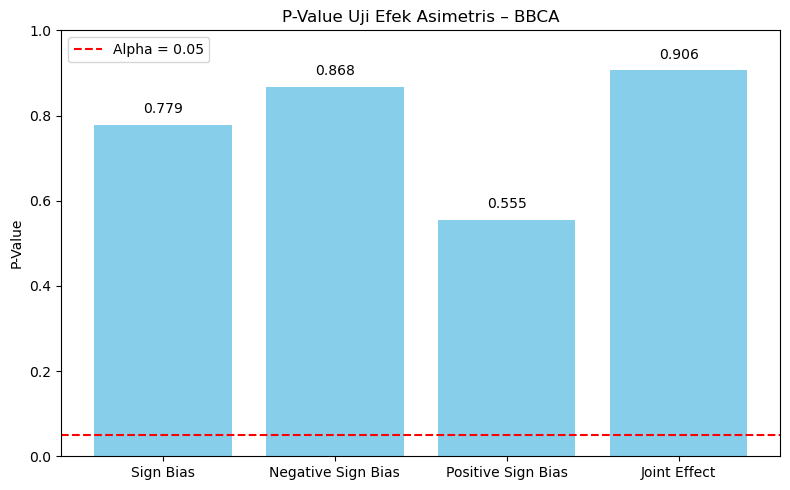

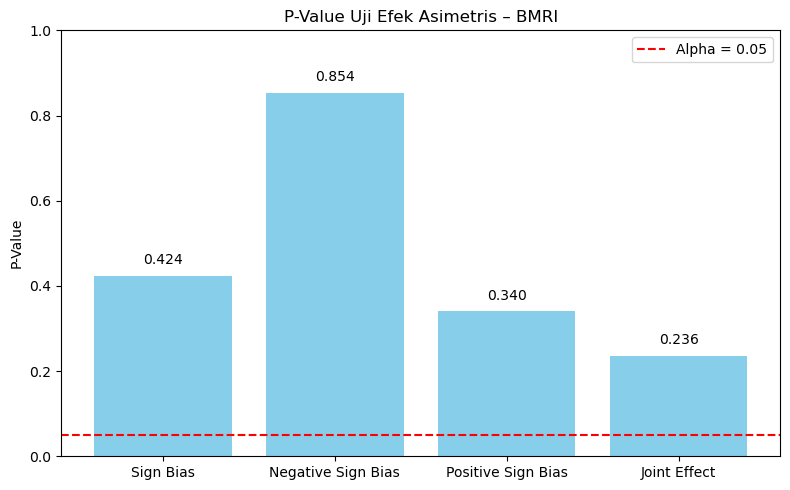

In [ ]:
import matplotlib.pyplot as plt

def plot_asymmetry_pvalues(garch_fit, label="Model"):
    resid = garch_fit.resid.dropna()
    sigma2 = garch_fit.conditional_volatility.dropna() ** 2
    index = resid.index.intersection(sigma2.index)

    resid = resid.loc[index]
    sigma2 = sigma2.loc[index]

    D_sign = (resid.shift(1) < 0).astype(int).loc[index]
    D_neg = ((resid.shift(1) < 0) * resid.shift(1)).loc[index]
    D_pos = ((resid.shift(1) >= 0) * resid.shift(1)).loc[index]

    y = (resid ** 2 / sigma2).loc[index]

    data = pd.DataFrame({
        'y': y,
        'const': 1,
        'D_sign': D_sign,
        'D_neg': D_neg,
        'D_pos': D_pos
    }).dropna()

    reg_sign = sm.OLS(data['y'], data[['const', 'D_sign']]).fit()
    reg_neg = sm.OLS(data['y'], data[['const', 'D_neg']]).fit()
    reg_pos = sm.OLS(data['y'], data[['const', 'D_pos']]).fit()
    reg_joint = sm.OLS(data['y'], data[['const', 'D_sign', 'D_neg', 'D_pos']]).fit()
    joint_test = reg_joint.f_test("D_sign = D_neg = D_pos = 0")

    # Kumpulkan semua p-value
    pvalues = {
        "Sign Bias": reg_sign.pvalues['D_sign'],
        "Negative Sign Bias": reg_neg.pvalues['D_neg'],
        "Positive Sign Bias": reg_pos.pvalues['D_pos'],
        "Joint Effect": joint_test.pvalue
    }

    # Plot
    plt.figure(figsize=(8, 5))
    bars = plt.bar(pvalues.keys(), pvalues.values(), color='skyblue')
    plt.axhline(0.05, color='red', linestyle='--', label='Alpha = 0.05')
    plt.title(f"P-Value Uji Efek Asimetris – {label}")
    plt.ylabel("P-Value")
    plt.ylim(0, 1)

    # Label p-value pada bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.02, f"{height:.3f}",
                 ha='center', va='bottom')

    plt.legend()
    plt.tight_layout()
    plt.show()

# Jalankan untuk BBCA dan BMRI
plot_asymmetry_pvalues(best_model_bbca[1], label="BBCA")
plot_asymmetry_pvalues(best_model_bmri[1], label="BMRI")


### Pemodelan EGARCH

In [ ]:
from arch import arch_model

egarch_results_bbca = {}

for p, q in [(1, 1), (1, 2), (2, 2)]:
    model = arch_model(residuals_bbca*100, vol='EGARCH', p=p, q=q, mean='Zero', dist='t')
    fit = model.fit(disp='off')
    egarch_results_bbca[f'EGARCH({p},{q})'] = fit
    print(f"EGARCH({p},{q}) AIC:", fit.aic)

# Pilih model dengan AIC terkecil
best_egarch_bbca = min(egarch_results_bbca.items(), key=lambda x: x[1].aic)
print("\nModel EGARCH terbaik untuk BBCA:", best_egarch_bbca[0])
print(best_egarch_bbca[1].summary())

EGARCH(1,1) AIC: 3231.2495020170545
EGARCH(1,2) AIC: 3232.4452475194735
EGARCH(2,2) AIC: 3233.9221265307688

Model EGARCH terbaik untuk BBCA: EGARCH(1,1)
                          Zero Mean - EGARCH Model Results                          
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.001
Vol Model:                           EGARCH   Log-Likelihood:               -1611.62
Distribution:      Standardized Student's t   AIC:                           3231.25
Method:                  Maximum Likelihood   BIC:                           3250.75
                                              No. Observations:                  968
Date:                      Thu, Jun 05 2025   Df Residuals:                      968
Time:                              02:19:06   Df Model:                            0
                              Volatility Model                             
     

In [ ]:
egarch_results_bmri = {}

for p, q in [(1, 1), (1, 2), (2, 2)]:
    model = arch_model(residuals_bmri*100, vol='EGARCH', p=p, q=q, mean='Zero', dist='t')
    fit = model.fit(disp='off')
    egarch_results_bmri[f'EGARCH({p},{q})'] = fit
    print(f"EGARCH({p},{q}) AIC:", fit.aic)

# Pilih model dengan AIC terkecil
best_egarch_bmri = min(egarch_results_bmri.items(), key=lambda x: x[1].aic)
print("\nModel EGARCH terbaik untuk BMRI:", best_egarch_bmri[0])
print(best_egarch_bmri[1].summary())

EGARCH(1,1) AIC: 3725.746111901545
EGARCH(1,2) AIC: 3727.7121706495136
EGARCH(2,2) AIC: 3729.725147465079

Model EGARCH terbaik untuk BMRI: EGARCH(1,1)
                          Zero Mean - EGARCH Model Results                          
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.001
Vol Model:                           EGARCH   Log-Likelihood:               -1858.87
Distribution:      Standardized Student's t   AIC:                           3725.75
Method:                  Maximum Likelihood   BIC:                           3745.25
                                              No. Observations:                  968
Date:                      Thu, Jun 05 2025   Df Residuals:                      968
Time:                              02:19:45   Df Model:                            0
                              Volatility Model                             
       

### VaR dan CVaR EGARCH

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import t, norm

def compute_var_cvar(egarch_fit, conf_levels=[0.90, 0.95, 0.99], label="Model"):
    from scipy.stats import t, norm
    import numpy as np
    import pandas as pd

    forecast = egarch_fit.forecast(horizon=1)
    mu = forecast.mean.iloc[-1, 0]
    sigma = np.sqrt(forecast.variance.iloc[-1, 0])

    # Tangkap nama distribusi dan normalisasi
    raw_dist = egarch_fit.model.distribution.name.lower()
    if raw_dist in ['t', 'studentst', 'students_t', "standardized student's t"]:
        dist = 't'
    elif raw_dist in ['normal', 'gaussian']:
        dist = 'normal'
    else:
        raise ValueError(f"Distribusi belum didukung: {raw_dist}")

    alpha = 1 - np.array(conf_levels)

    if dist == 't':
        df = egarch_fit.params['nu']
        q = t.ppf(alpha, df)
        d = t.pdf(q, df)
        VaR = mu + sigma * q
        CVaR = mu + sigma * (d / alpha) * ((df + q**2) / (df - 1))
    elif dist == 'normal':
        q = norm.ppf(alpha)
        d = norm.pdf(q)
        VaR = mu + sigma * q
        CVaR = mu + sigma * (d / alpha)

    df_out = pd.DataFrame({
        "Confidence_Level": [f"{int(c*100)}%" for c in conf_levels],
        "VaR": np.round(VaR/100, 6),
        "CVaR": np.round(-CVaR/100, 6)
    })

    print(f"\n📉 VaR & CVaR dari EGARCH – {label}")
    print(df_out)
    return df_out


In [ ]:
varcvaregarch_bbca = compute_var_cvar(best_egarch_bbca[1], label="BBCA")
varcvaregarch_bmri = compute_var_cvar(best_egarch_bmri[1], label="BMRI")



📉 VaR & CVaR dari EGARCH – BBCA
  Confidence_Level       VaR      CVaR
0              90% -0.019617 -0.029703
1              95% -0.026438 -0.036754
2              99% -0.042584 -0.054435

📉 VaR & CVaR dari EGARCH – BMRI
  Confidence_Level       VaR      CVaR
0              90% -0.027560 -0.042831
1              95% -0.037568 -0.053672
2              99% -0.062457 -0.082284


### Backtesting

In [ ]:
def backtest_var_cvar(varcvar_df, harga_t, harga_t1):
    # Hitung return aktual
    actual_return = ((harga_t1 / harga_t) - 1)

    # Bandingkan terhadap VaR dan CVaR
    var_breach = (abs(actual_return) > abs(varcvar_df['VaR'])).astype(int)
    cvar_breach = (abs(actual_return) > abs(varcvar_df['CVaR'])).astype(int)

    # Buat tabel hasil
    backtest_result = varcvar_df.copy()
    backtest_result['Actual_Return'] = round(actual_return, 6)
    backtest_result['VaR_Breach'] = var_breach
    backtest_result['CVaR_Breach'] = cvar_breach

    print("\n📊 Hasil Backtesting EGARCH:")
    print(backtest_result)
    return backtest_result


In [ ]:
backtest_bbca = backtest_var_cvar(varcvaregarch_bbca, harga_t=9675, harga_t1=9900)


📊 Hasil Backtesting EGARCH:
  Confidence_Level       VaR      CVaR  Actual_Return  VaR_Breach  CVaR_Breach
0              90% -0.019617 -0.029703       0.023256           1            0
1              95% -0.026438 -0.036754       0.023256           0            0
2              99% -0.042584 -0.054435       0.023256           0            0


In [ ]:
backtest_bmri = backtest_var_cvar(varcvaregarch_bmri, harga_t=5700, harga_t1=5850)


📊 Hasil Backtesting EGARCH:
  Confidence_Level       VaR      CVaR  Actual_Return  VaR_Breach  CVaR_Breach
0              90% -0.027560 -0.042831       0.026316           0            0
1              95% -0.037568 -0.053672       0.026316           0            0
2              99% -0.062457 -0.082284       0.026316           0            0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_price_with_var_cvar(price_series, var_row, label="BBCA"):
    # Ambil hanya 30 data terakhir (biar fokus)
    price_last = price_series[-30:]
    dates = price_last.index
    prices = price_last.values

    # Ambil nilai VaR & CVaR dari baris tertentu (misalnya tingkat kepercayaan 95%)
    var_value = var_row['VaR']
    cvar_value = var_row['CVaR']

    # Asumsikan harga_t adalah harga terakhir dan kita hitung batas bawah (kerugian)
    price_t = prices[-1]
    var_lower = price_t * (1 + var_value)
    var_upper = price_t * (1 - var_value)
    cvar_lower = price_t * (1 + cvar_value)
    cvar_upper = price_t * (1 - cvar_value)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(dates, prices, color='black', label='Harga Saham')
    plt.axhline(var_lower, color='gold', linestyle='--', label='VaR Lower Bound')
    plt.axhline(var_upper, color='gold', linestyle='--', label='VaR Upper Bound')
    plt.axhline(cvar_lower, color='red', linestyle='--', label='CVaR Lower Bound')
    plt.axhline(cvar_upper, color='red', linestyle='--', label='CVaR Upper Bound')

    plt.title(f"Harga Saham dan Batas VaR / CVaR – {label}")
    plt.xlabel("Tanggal")
    plt.ylabel("Harga")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
# Jadikan Series harga BBCA dengan index datetime
series_harga_bbca = gabung.set_index("Date")["BBCA"]
series_harga_bmri = gabung.set_index("Date")["BMRI"]

In [ ]:
series_harga_bbca

Date
2021-01-04    6835.0
2021-01-05    7090.0
2021-01-06    6945.0
2021-01-07    6965.0
2021-01-08    7050.0
               ...  
2024-12-20    9650.0
2024-12-23    9775.0
2024-12-24    9750.0
2024-12-27    9800.0
2024-12-30    9675.0
Name: BBCA, Length: 969, dtype: float64

In [ ]:
series_harga_bmri

Date
2021-01-04    3250.0
2021-01-05    3212.5
2021-01-06    3212.5
2021-01-07    3237.5
2021-01-08    3275.0
               ...  
2024-12-20    5675.0
2024-12-23    5825.0
2024-12-24    5750.0
2024-12-27    5800.0
2024-12-30    5700.0
Name: BMRI, Length: 969, dtype: float64

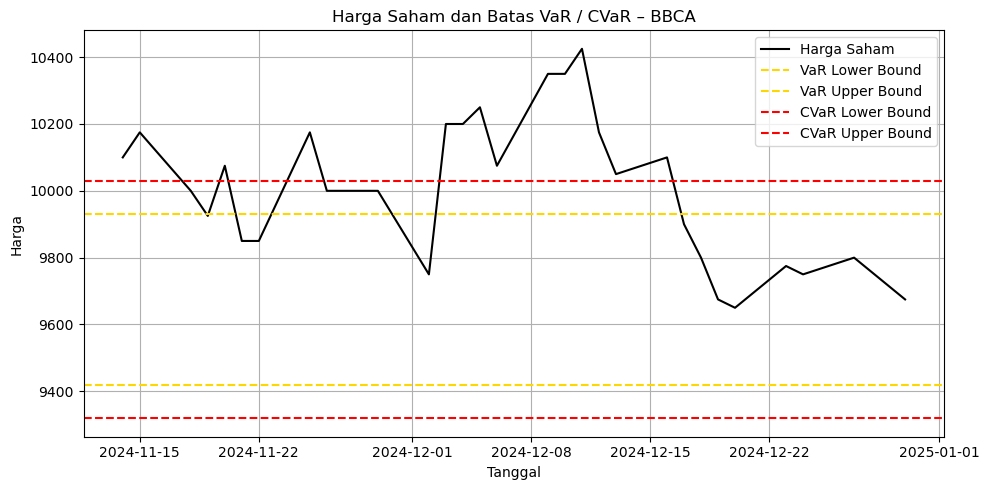

In [ ]:
# Ambil baris untuk level kepercayaan 95% dari hasil varcvaregarch
row_95_bbca = varcvaregarch_bbca[varcvaregarch_bbca['Confidence_Level'] == '95%'].iloc[0]

plot_price_with_var_cvar(series_harga_bbca, row_95_bbca, label="BBCA")

In [ ]:
def plot_price_with_var_cvar_dynamic(price_series, var_row, label="BBCA"):
    import matplotlib.pyplot as plt
    import pandas as pd

    price_last = price_series[-15:]
    dates = price_last.index
    prices = price_last.values

    # Titik referensi harga t (terakhir)
    date_t = dates[-1]
    price_t = prices[-1]

    # Simulasikan tanggal t+1
    date_t1 = pd.date_range(start=date_t, periods=2, freq='B')[-1]

    # Ambil nilai VaR & CVaR untuk level tertentu
    var_pct = var_row['VaR']
    cvar_pct = var_row['CVaR']

    # Hitung batas harga ke bawah berdasarkan return
    var_price = price_t * (1 + var_pct)
    cvar_price = price_t * (1 + cvar_pct)

    # Plot harga historis
    plt.figure(figsize=(10, 5))
    plt.plot(dates, prices, color='black', label='Harga Saham')

    # Garis diagonal: dari harga_t ke harga_t+1 dengan batas VaR dan CVaR
    plt.plot([date_t, date_t1], [price_t, var_price], color='gold', linestyle='--', label='VaR')
    plt.plot([date_t, date_t1], [price_t, cvar_price], color='red', linestyle='--', label='CVaR')

    # Format plot
    plt.title(f"Harga Saham dan Proyeksi VaR / CVaR – {label}")
    plt.xlabel("Tanggal")
    plt.ylabel("Harga")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


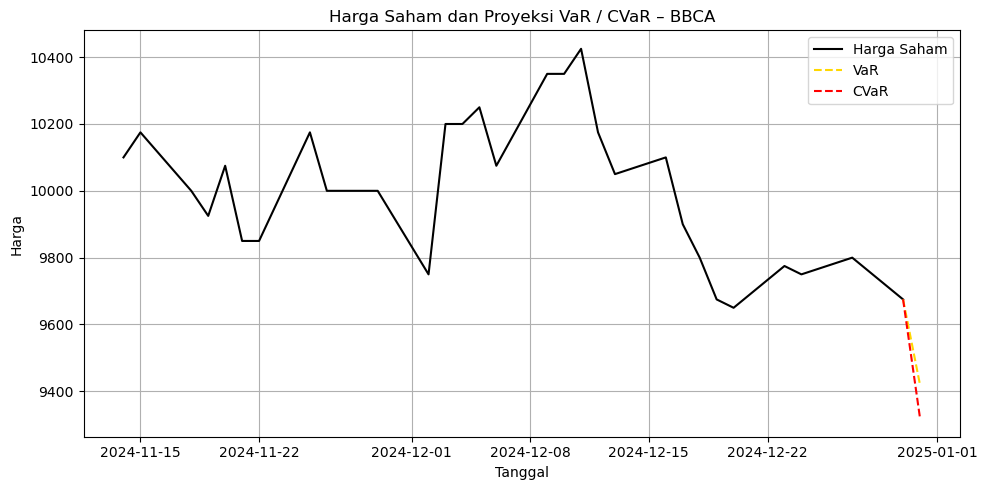

In [ ]:
row_95_bbca = varcvaregarch_bbca[varcvaregarch_bbca['Confidence_Level'] == '95%'].iloc[0]
plot_price_with_var_cvar_dynamic(series_harga_bbca, row_95_bbca, label="BBCA")

In [ ]:
def plot_price_with_var_cvar_dynamic_full(price_series, var_row, harga_t1_actual=None, label="BBCA"):
    import matplotlib.pyplot as plt
    import pandas as pd

    # Ambil 30 data terakhir harga saham
    price_last = price_series[-10:]
    dates = price_last.index
    prices = price_last.values

    # Titik harga terakhir (waktu t)
    date_t = dates[-1]
    price_t = prices[-1]

    # Tanggal t+1 (hari kerja berikutnya)
    date_t1 = pd.date_range(start=date_t, periods=2, freq='B')[-1]

    # Ambil nilai VaR dan CVaR
    var_pct = abs(var_row['VaR'])  # Gunakan nilai absolut supaya bisa ke atas & ke bawah
    cvar_pct = abs(var_row['CVaR'])

    # Hitung batas atas dan bawah (Naik dan Turun)
    var_lower = price_t * (1 - var_pct)
    var_upper = price_t * (1 + var_pct)
    cvar_lower = price_t * (1 - cvar_pct)
    cvar_upper = price_t * (1 + cvar_pct)

    # Plot harga historis
    plt.figure(figsize=(10, 5))
    plt.plot(dates, prices, color='black', label='Harga Saham')

    # Garis proyeksi ke bawah dan atas dari harga_t
    plt.plot([date_t, date_t1], [price_t, var_lower], color='gold', linestyle='--', label='VaR (-)')
    plt.plot([date_t, date_t1], [price_t, var_upper], color='gold', linestyle='--', label='VaR (+)')
    plt.plot([date_t, date_t1], [price_t, cvar_lower], color='red', linestyle='--', label='CVaR (-)')
    plt.plot([date_t, date_t1], [price_t, cvar_upper], color='red', linestyle='--', label='CVaR (+)')

    # Garis ke harga aktual t+1 jika tersedia
    if harga_t1_actual:
        plt.plot([date_t, date_t1], [price_t, harga_t1_actual], color='blue', linestyle='-', label='Return Aktual')

    # Judul dan label
    plt.title(f"Harga Saham dan Proyeksi Risiko – {label}")
    plt.xlabel("Tanggal")
    plt.ylabel("Harga")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


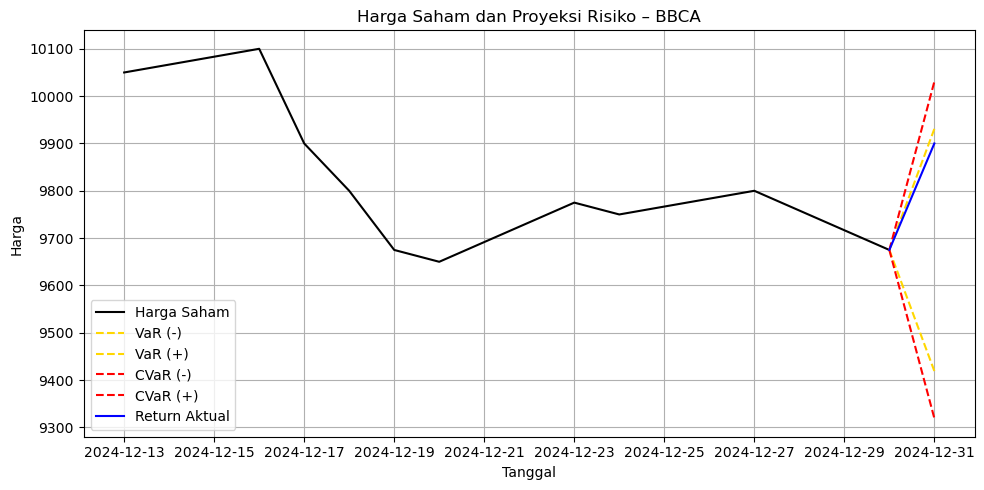

In [ ]:
row_95_bbca = varcvaregarch_bbca[varcvaregarch_bbca['Confidence_Level'] == '95%'].iloc[0]
plot_price_with_var_cvar_dynamic_full(series_harga_bbca, row_95_bbca, harga_t1_actual=9900, label="BBCA")

# EVT

## BBCA

### Block Maxima

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi block maxima
def block_maxima(data, block_size):
    n_blocks = len(data) // block_size
    return np.array([
        np.nanmax(data[i*block_size:(i+1)*block_size])
        for i in range(n_blocks)
    ])

# Hitung log return dari harga saham BBCA
log_return_bbca = np.diff(np.log(series_harga_bbca.values))
return_dates = series_harga_bbca.index[1:]  # karena diff mengurangi satu elemen

# Hitung block maxima
block_size = 5
bm_bbca = block_maxima(log_return_bbca, block_size)

# Ambil tanggal terakhir dari setiap blok
block_dates = np.array([
    return_dates[(i+1)*block_size - 1]
    for i in range(len(bm_bbca))
])


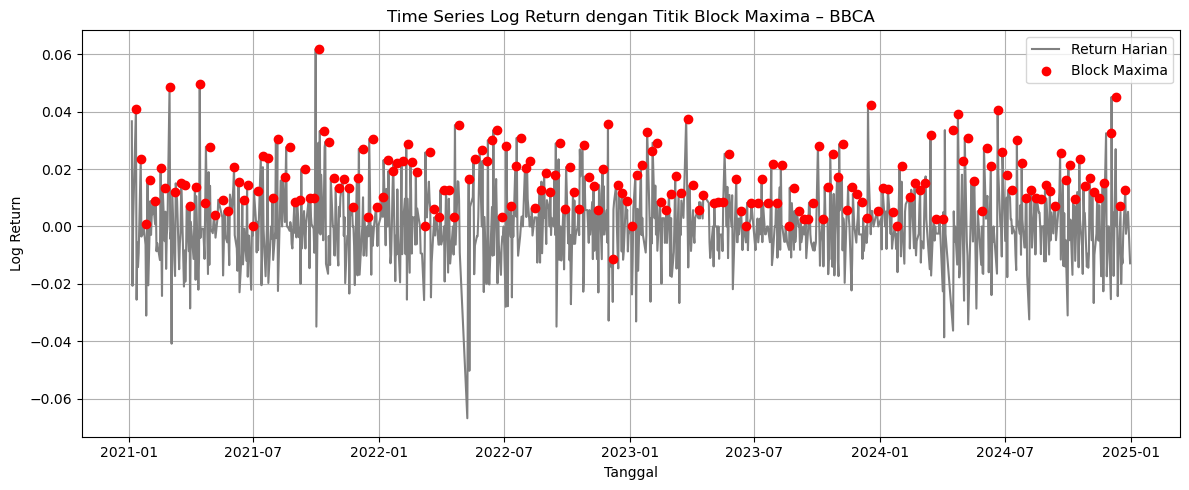

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(return_dates, log_return_bbca, color='gray', label='Return Harian')
plt.scatter(block_dates, bm_bbca, color='red', label='Block Maxima', zorder=5)

plt.title('Time Series Log Return dengan Titik Block Maxima – BBCA')
plt.xlabel('Tanggal')
plt.ylabel('Log Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 1. Uji Mann-Kendall Trend

In [ ]:
!pip install pymannkendall

In [ ]:
import pymannkendall as mk

# Uji Mann-Kendall terhadap block maxima BBCA
mk_result = mk.original_test(bm_bbca)

# Tampilkan hasil
print("Mann-Kendall Trend Test:")
print(f"Trend     : {mk_result.trend}")
print(f"P-value   : {mk_result.p}")
print(f"Tau       : {mk_result.Tau}")
print(f"Hipotesis : {'Tolak H0' if mk_result.p < 0.05 else 'Gagal Tolak H0'}")
print(f"Hasil     : {'Signifikan' if mk_result.p < 0.05 else 'Tidak Signifikan'}")
print(f"Keputusan : {'Ada Tren' if mk_result.p < 0.05 else 'Tidak Ada Tren'}")
print(f"Kesimpulan: {'GEV Non-Stasioner' if mk_result.p < 0.05 else 'GEV Stasioner'}")


Mann-Kendall Trend Test:
Trend     : no trend
P-value   : 0.47355657299127074
Tau       : -0.03475820379965458
Hipotesis : Gagal Tolak H0
Hasil     : Tidak Signifikan
Keputusan : Tidak Ada Tren
Kesimpulan: GEV Stasioner


### 2. Estimasi Parameter GEV

In [ ]:
from scipy.stats import genextreme

# Estimasi parameter GEV (pakai -shape karena konvensi scipy)
shape, loc, scale = genextreme.fit(bm_bbca)

print("Parameter GEV:")
print(f"Shape (ξ): {shape:.4f}")
print(f"Loc   (μ): {loc:.4f}")
print(f"Scale (σ): {scale:.4f}")


Parameter GEV:
Shape (ξ): 0.0666
Loc   (μ): 0.0118
Scale (σ): 0.0092


### 3. Uji Kolmogorov–Smirnov (KS Test)

In [ ]:
from scipy.stats import ks_1samp

# Tambahkan jitter kecil agar nilai tidak identik
bm_bbca_jitter = bm_bbca + np.random.uniform(-1e-6, 1e-6, size=len(bm_bbca))

# Uji KS: bandingkan dengan distribusi GEV hasil fit
ks_stat, ks_pvalue = ks_1samp(bm_bbca_jitter, cdf=lambda x: genextreme.cdf(x, shape, loc=loc, scale=scale))

print("\nKolmogorov–Smirnov Test:")
print(f"KS Statistic : {ks_stat:.4f}")
print(f"P-Value       : {ks_pvalue:.4f}")
print("Hasil         :", "Distribusi sesuai GEV" if ks_pvalue > 0.05 else "Distribusi tidak sesuai GEV")



Kolmogorov–Smirnov Test:
KS Statistic : 0.0415
P-Value       : 0.8798
Hasil         : Distribusi sesuai GEV


### VaR dan CVaR EVT

In [ ]:
from scipy.stats import genextreme
import numpy as np
import pandas as pd

# Parameter hasil fitting (pastikan dari genextreme.fit sebelumnya)
# Hati-hati: scipy gunakan -shape dibanding R
shape = shape     # dari sebelumnya
loc = loc         # dari sebelumnya
scale = scale     # dari sebelumnya

# Tingkat kepercayaan
alpha_levels = np.array([0.90, 0.95, 0.99])

# Hitung VaR (quantile dari GEV)
VaR = genextreme.ppf(alpha_levels, shape, loc=loc, scale=scale)

# Hitung CVaR
CVaR = []
for i, alpha in enumerate(alpha_levels):
    var = VaR[i]
    if shape == 0:
        cvar = var + scale / (1 - alpha)
    else:
        cvar = var + (scale - shape * (var - loc)) / (1 - shape)
    CVaR.append(cvar)

# Buat DataFrame hasil
varcvarevt = pd.DataFrame({
    'Confidence_Level': [f"{int(a*100)}%" for a in alpha_levels],
    'VaR': np.round(VaR, 6),
    'CVaR': np.round(CVaR, 6)
})

print("📉 VaR & CVaR berdasarkan GEV:")
print(varcvarevt)


📉 VaR & CVaR berdasarkan GEV:
  Confidence_Level       VaR      CVaR
0              90%  0.031125  0.039639
1              95%  0.036710  0.044825
2              99%  0.048410  0.055690


### Backtesting GEV

In [ ]:
# Harga aktual t dan t+1
harga_t = 9675
harga_t1 = 9900

# Hitung return aktual (sebagai desimal)
return_t1 = (harga_t1 / harga_t) - 1
print(f"Return Aktual: {return_t1:.6f}")

# Buat indikator pelampauan (breach)
VaR_breach = (np.abs(return_t1) > np.abs(VaR)).astype(int)
CVaR_breach = (np.abs(return_t1) > np.abs(CVaR)).astype(int)

# Buat tabel hasil evaluasi
resultgev = pd.DataFrame({
    'Confidence_Level': [f"{int(a*100)}%" for a in alpha_levels],
    'VaR': np.round(VaR, 6),
    'CVaR': np.round(CVaR, 6),
    'Actual_Return': np.round(return_t1, 6),
    'VaR_Breach': VaR_breach,
    'CVaR_Breach': CVaR_breach
})

print("\n📊 Hasil Backtesting GEV:")
print(resultgev)


Return Aktual: 0.023256

📊 Hasil Backtesting GEV:
  Confidence_Level       VaR      CVaR  Actual_Return  VaR_Breach  CVaR_Breach
0              90%  0.031125  0.039639       0.023256           0            0
1              95%  0.036710  0.044825       0.023256           0            0
2              99%  0.048410  0.055690       0.023256           0            0


In [ ]:
def plot_gev_var_cvar(price_series, var_value, cvar_value, harga_t1_actual, label="BBCA", conf_level="95%"):
    import matplotlib.pyplot as plt
    import pandas as pd

    # Ambil data 30 hari terakhir
    harga_akhir = price_series[-30:]
    tanggal = harga_akhir.index
    harga = harga_akhir.values

    # Titik waktu t (terakhir)
    date_t = tanggal[-1]
    price_t = harga[-1]
    # Hari t+1 (hari kerja berikut)
    date_t1 = pd.date_range(start=date_t, periods=2, freq='B')[-1]

    # Hitung nilai VaR dan CVaR sebagai harga proyeksi
    price_var = price_t * (1 + var_value)
    price_cvar = price_t * (1 + cvar_value)

    # Plot harga historis
    plt.figure(figsize=(10, 5))
    plt.plot(tanggal, harga, color='black', label='Harga Saham')

    # Plot garis VaR dan CVaR
    plt.plot([date_t, date_t1], [price_t, price_var], color='gold', linestyle='--', label=f'VaR {conf_level}')
    plt.plot([date_t, date_t1], [price_t, price_cvar], color='red', linestyle='--', label=f'CVaR {conf_level}')

    # Plot garis harga aktual t+1
    plt.plot([date_t, date_t1], [price_t, harga_t1_actual], color='blue', label='Harga Aktual t+1')

    # Format
    plt.title(f"Harga Saham dan Risiko GEV – {label}")
    plt.xlabel("Tanggal")
    plt.ylabel("Harga")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


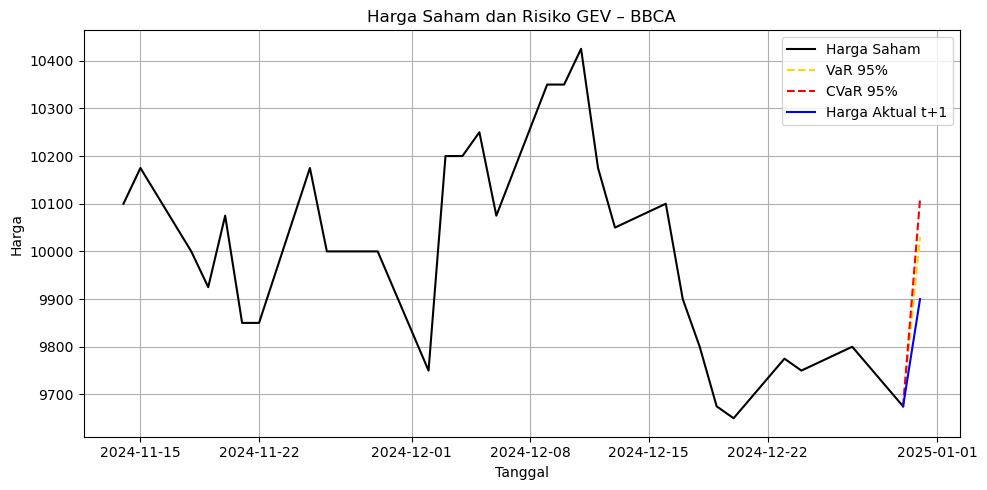

In [ ]:
# Ambil row 95%
row_95_gev = varcvarevt[varcvarevt["Confidence_Level"] == "95%"].iloc[0]

plot_gev_var_cvar(
    price_series=series_harga_bbca,
    var_value=row_95_gev["VaR"],
    cvar_value=row_95_gev["CVaR"],
    harga_t1_actual=9900,  # harga aktual hari t+1
    label="BBCA",
    conf_level="95%"
)


In [ ]:
import plotly.graph_objs as go
import pandas as pd

def interactive_plot_gev(price_series, var_value, cvar_value, harga_t1_actual, label="BBCA", conf_level="95%"):
    # Ambil 30 hari terakhir
    harga_akhir = price_series[-30:]
    tanggal = harga_akhir.index
    harga = harga_akhir.values

    # Titik waktu t (terakhir)
    date_t = tanggal[-1]
    price_t = harga[-1]
    date_t1 = pd.date_range(start=date_t, periods=2, freq='B')[-1]

    # Hitung batas VaR dan CVaR sebagai harga
    price_var = price_t * (1 + var_value)
    price_cvar = price_t * (1 + cvar_value)

    fig = go.Figure()

    # Harga historis
    fig.add_trace(go.Scatter(x=tanggal, y=harga, mode='lines', name='Harga Saham', line=dict(color='black')))

    # Garis VaR
    fig.add_trace(go.Scatter(
        x=[date_t, date_t1], y=[price_t, price_var],
        mode='lines+markers', name=f'VaR {conf_level}',
        line=dict(color='gold', dash='dash')
    ))

    # Garis CVaR
    fig.add_trace(go.Scatter(
        x=[date_t, date_t1], y=[price_t, price_cvar],
        mode='lines+markers', name=f'CVaR {conf_level}',
        line=dict(color='red', dash='dash')
    ))

    # Garis harga aktual t+1
    fig.add_trace(go.Scatter(
        x=[date_t, date_t1], y=[price_t, harga_t1_actual],
        mode='lines+markers', name='Harga Aktual t+1',
        line=dict(color='blue')
    ))

    fig.update_layout(
        title=f"Harga Saham dan Proyeksi Risiko GEV – {label}",
        xaxis_title="Tanggal",
        yaxis_title="Harga",
        legend=dict(x=0.01, y=0.99),
        template="plotly_white"
    )

    fig.show()


#### iubefkabflaskfbaksfajk